# Predicting creditcards approval v2

Plan
1. Data already cleaned from previous notebook
2. EDA
3. Come up with some sense of the dataset before going into building models
4. Define problem statement and come up with assumptions
<br>
<br>
5. Preprocessing what more can we do - dimensional reduction, NMF??
6. Fine tune each model's parameters to squeeze out the best for each model
7. Compare different classification models - knn, logistic regression 

## Get data from cleaned source

In [366]:
# import packages
import pandas as pd
import numpy as np
# read csv
df = pd.read_csv('cc_approvals_cleaned.csv')
print(df.head())
print('-'*40)
print(df.info())

  Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income ApprovalStatus  
0      202       0              +  
1       43     560        

In [367]:
# change zipcode to string again, got reseted when reloaded csv
df.ZipCode = df.ZipCode.astype('str')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          664 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            664 non-null    float64
 3   Married         664 non-null    object 
 4   BankCustomer    664 non-null    object 
 5   EducationLevel  664 non-null    object 
 6   Ethnicity       664 non-null    object 
 7   YearsEmployed   664 non-null    float64
 8   PriorDefault    664 non-null    object 
 9   Employed        664 non-null    object 
 10  CreditScore     664 non-null    int64  
 11  DriversLicense  664 non-null    object 
 12  Citizen         664 non-null    object 
 13  ZipCode         664 non-null    object 
 14  Income          664 non-null    int64  
 15  ApprovalStatus  664 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 83.1+ KB
None


## Problem statement
1. Who are our creditcards customers?
2. Which features influenced approval decision?
3. Given application data, develop a classification model to predict creditcard approval to save manual application revision time.


## EDA

1. Most of applicants are under 40 years old
2. Median income is 5.00 !!!!

In [368]:
# Inspect data
print(df.describe())
print(df.describe(include=['O']))

              Age        Debt  YearsEmployed  CreditScore         Income
count  653.000000  664.000000     664.000000   664.000000     664.000000
mean    31.503813    4.799285       2.261777     2.468373    1003.585843
std     11.838267    5.004580       3.367623     4.935685    5211.191653
min     13.750000    0.000000       0.000000     0.000000       0.000000
25%     22.580000    1.000000       0.165000     0.000000       0.000000
50%     28.420000    2.855000       1.000000     0.000000       5.000000
75%     38.250000    7.122500       2.750000     3.000000     397.000000
max     76.750000   28.000000      28.500000    67.000000  100000.000000
       Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
count     664     664          664            664       664          664   
unique      2       3            3             14         9            2   
top         b       u            g              c         v            t   
freq      459     506          506     

In [369]:
# Separate categorical and numerical features
cat_feats = []
num_feats = []
for col in df.columns:
    if col == 'ApprovalStatus':
        pass # this is our target variable
    elif df[col].dtype == object:
        # print(col, 'is a cat feat')
        cat_feats.append(col)
    else:
        # print(col, 'is a num feat')
        num_feats.append(col)
print('Categorical features:', cat_feats)
print('Numerical features:', num_feats)

Categorical features: ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']
Numerical features: ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']


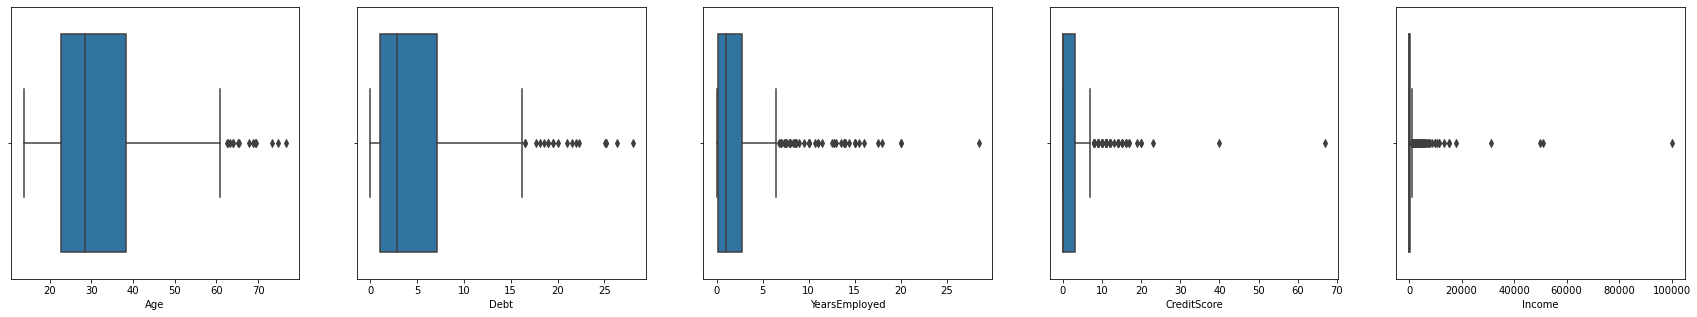

In [370]:
# Visualize numerical features to find outliers
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=len(num_feats), figsize=(30,5))
for i in range(len(num_feats)):
    _ = sns.boxplot(data=df, x=num_feats[i], ax=ax[i])
plt.show()

In [371]:
# Visualize ApprovalStatus in terms of cat feature
for cat_feat in cat_feats:
    # if df[cat_feat].nunique() < 7:
        # _ = sns.catplot(data=df, x='ApprovalStatus', kind='count', col=cat_feat)
        # plt.show()
    print(pd.crosstab(index=df[cat_feat], columns=df['ApprovalStatus']))
        

ApprovalStatus    +    -
Gender                  
a                95  110
b               203  256
ApprovalStatus    +    -
Married                 
l                 2    0
u               251  255
y                45  111
ApprovalStatus    +    -
BankCustomer            
g               251  255
gg                2    0
p                45  111
ApprovalStatus   +   -
EducationLevel        
aa              19  34
c               60  74
cc              29  11
d                7  22
e               14  10
ff               7  44
i               14  43
j                3   7
k               13  36
m               16  22
q               49  26
r                2   1
w               33  30
x               32   6
ApprovalStatus    +    -
Ethnicity               
bb               24   31
dd                2    4
ff                8   47
h                87   50
j                 3    5
n                 2    2
o                 1    1
v               165  224
z                 6    2
Approva

Cat features value has no meaning we can infer on .....

Base model in last notebook managed to get around 84% accuracy.<br>
See how can we improve on that.

## Preprocessing
1. Drop zipcode - so many
2. Label encode cat features
3. Mean impute num features

In [372]:
# separate cat and num features and drop ZipCode
X_num = df.loc[:, num_feats]
X_cat = df.loc[:, cat_feats]
X_cat = X_cat.drop(['ZipCode'], axis=1)
cat_feats.remove('ZipCode')
y = df.loc[:,'ApprovalStatus']


In [373]:
# hot one encoding for nominal categorical variables
X_cat = pd.get_dummies(X_cat)

# # categorize categorical feats to nominal and ordinal
# cat_feats_nominal = cat_feats.copy()
# cat_feats_nominal.remove('EducationLevel')
# cat_feats_ordinal = ['EducationLevel']
# # ordinal encoding ordinal categorical variables
# print(X_cat['EducationLevel'].unique()) # we don't know the true values of the education levels given --> so we'll just do hot one encoding for all

Mean imputation and median imputation got similar results

In [374]:
# imputation for numerical features
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='median') 
X_num = pd.DataFrame(im.fit_transform(X_num), columns=X_num.columns)

Standard scaler is prone to outliers which are especially present in features ['CreditScore', 'Income'] <br>
Try to use robust scaler --> same AUC of 0.90, but slightly better accuracy 0.83 vs 0.81

In [375]:
# scale numeric features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

In [376]:
# concatenate X_cat and X_num --> X
X = pd.concat([X_num, X_cat], axis=1)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                664 non-null    float64
 1   Debt               664 non-null    float64
 2   YearsEmployed      664 non-null    float64
 3   CreditScore        664 non-null    float64
 4   Income             664 non-null    float64
 5   Gender_a           664 non-null    uint8  
 6   Gender_b           664 non-null    uint8  
 7   Married_l          664 non-null    uint8  
 8   Married_u          664 non-null    uint8  
 9   Married_y          664 non-null    uint8  
 10  BankCustomer_g     664 non-null    uint8  
 11  BankCustomer_gg    664 non-null    uint8  
 12  BankCustomer_p     664 non-null    uint8  
 13  EducationLevel_aa  664 non-null    uint8  
 14  EducationLevel_c   664 non-null    uint8  
 15  EducationLevel_cc  664 non-null    uint8  
 16  EducationLevel_d   664 non

## Build logistic regression base model

In [377]:
# train:test = 90:10 w/ constant random state to duplicate
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


In [378]:
# fit and predict for base model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
y_base_model = log_reg.predict(X_test)

In [379]:
# View results for base model
from sklearn.metrics import classification_report
# classification report
print('Classification report')
print(classification_report(y_test, y_base_model))

Classification report
              precision    recall  f1-score   support

           +       0.81      0.82      0.81        66
           -       0.82      0.81      0.81        67

    accuracy                           0.81       133
   macro avg       0.81      0.81      0.81       133
weighted avg       0.81      0.81      0.81       133



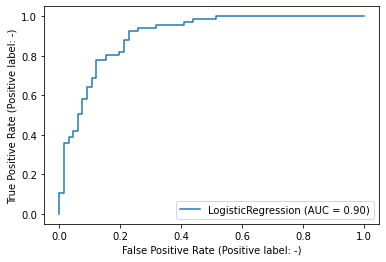

In [380]:
# ROC of base model
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

## Fine tune logistic regression